# Lineární hyperbolický systém PDR 1. řádu

**Definice:**
Systém PDR ve tvaru $U_t + A U_x = 0$, kde $U: \mathbb R\times\mathbb R_+ \to \mathbb R^l$ a $A \in \mathbb R^{l,l}$ nazveme *hyperbolickým* právě tehdy, když matice $A$ má $l$ reálných vlastních čísel a $l$ lineárně nezávislých vlastních vektorů.



## Charakteristické proměnné

Splňuje-li $A$ výše uvedené podmínky, je možné ji rozložit na součin
$$
    A = R \Lambda R^{-1},
$$
kde $\Lambda=diag(\lambda_1, \lambda_2, ..., \lambda_l)$ je diagonální matice a $R$ obsahuje ve sloupcích příslušné vlastní vektory, tj. $R=[\vec{r}_1, \vec{r}_2, ..., \vec{r}_l]$. 

Systém pak lze přepsat jako
$$
U_t + R \Lambda R^{-1} U_x = 0
$$
a po vynásobení maticí $R^{-1}$ zleva dostáváme
$$
R^{-1} U_t + R^{-1} R \Lambda R^{-1} U_x = (R^{-1} U)_t + E \Lambda (R^{-1} U)_x = 0.
$$

Označíme-li $V = R^{-1} U$, je původní systém ekvivalentní systému $l$ nezávislých rovnic 
$$
    V_t + \Lambda V_x = 0
$$
což je po složkách
$$
    \frac{\partial v_k}{\partial t} + \lambda_k \frac{\partial v_k}{\partial x} = 0.
$$

**Definice:** Mějme hyperbolický systém $U_t + A U_x = 0$. Proměnné $V = R^{-1} U$, kde $R$ je matice složená z vlastních vektorů matice $A$, nazveme *cahrakteristickými proměnnými*.

## Počáteční úloha pro lineární hyperbolický systém

**Definice:** Je dán hyperbolický systém $U_t + A U_x=0$ a vektorová funkce $U_0 \in C^1(\mathbb R \to \mathbb R^l)$ (počáteční podmínka). Počáteční úlohou pro tento systém s danou počáteční podmínkou budeme rozumět nalezení takové funkce $U \in C^1( \mathbb R\times\mathbb R_+ \to \mathbb R^l)$, že $\forall x \in \mathbb R$ a $\forall t > 0$ funkce $U$ vyhovuje danému systému a pro $t=0$ je $U(x,0)=u_0(x)$.

*Poznámka:* pro případ nespojité počáteční podmínky je třeba přejít ke slabému řešení.

Pro skalární problém  $v_t + \lambda v_x=0$ umíme pomocí metody charakteristik určit řešení jako $v(x,t) = v_0(x - \lambda t)$. Proto lze (v charakteristických proměnných) zapsat řešení počáteční úlohy jako
$$
    v_k(x,t) = v_k^0(x-\lambda_k t),
$$
kde $v_k^0$ je $k$-tá zložka vektoru $V^ = R^{-1} U_0$ a v původních $U$ je to tedy
$$
    U(x,t) = \sum_{k=1}^l \vec{r}_k v_k(x,t) = \sum_{k=1}^l \vec{r}_k v_k^0(x - \lambda_k t).
$$


## Příklad: linearizovaný systém Eulerových rovnic v 1D

Nelineární systém Eulerových rovnic v 1D lze zapsat jako
\begin{align*}
 \rho_t + (\rho u)_x &= 0, \\
 (\rho u)_t + (\rho u^2 + p)_x &= 0, \\
 (\rho E)_t + [(\rho E + p) u]_x &= 0,
\end{align*}
kde $\rho$ je hustota, $u$ je rychlost, $p$ je tlak a $E$ je celková energie vztažená na kg. Pro ideální plyn je ze stavové rovnice
$
    p = (\gamma-1)(\rho E - \frac{1}{2} \rho u^2).
$

Předpokládáme-li, že všechny valičiny mají spojité derivace, lze systém převést na tvar
\begin{align*}
 \rho_t + (\rho u)_x &= 0, \\
 u_t + u u_x + \frac{1}{\rho} p_x &= 0, \\
 p_t + u p_x + \gamma p u_x &= 0.
\end{align*}

Systém linearizujeme ($\rho(x,t) = \bar{\rho} + \rho'(x,t)$, podobně pro $u$ a $p$) a dostáváme
\begin{align*}
 \rho_t + \bar{u} \rho_x + \bar{\rho} u_x &= 0, \\
 u_t + \bar{u} u_x + \frac{1}{\bar\rho} p_x &= 0, \\
 p_t + \gamma \bar{p} u_x + \bar{u} p_x &= 0.
\end{align*}

Označme $U=[\rho, u, p]$. Potom dostáváme systém $U_t + A U_x = 0$ s maticí
$$
A = \begin{pmatrix}
\bar{u} & \bar{\rho} & 0 \\
0 & \bar{u} & 1/\bar{\rho} \\
0 & \gamma \bar{p} & \bar{u}
\end{pmatrix}.
$$


In [1]:
using SymPy

In [2]:
rhoBar, pBar, aBar, gamma = symbols("rhoBar,pBar,aBar,gamma", positive=true)
uBar = symbols("uBar");

In [3]:
A = [uBar rhoBar 0; 0 uBar 1/rhoBar; 0 gamma*pBar uBar]

3×3 Array{Sym,2}:
 uBar      rhoBar         0
    0        uBar  1/rhoBar
    0  gamma*pBar      uBar

In [4]:
using LinearAlgebra

In [5]:
eig = call_matrix_meth(A,:eigenvects)

3-element Array{Tuple{Sym,Int64,Array{Array{Sym,1},1}},1}:
 (uBar, 1, [[1, 0, 0]])                                                                                                                                                                                                                                            
 (-(sqrt(gamma)*sqrt(pBar) - sqrt(rhoBar)*uBar)/sqrt(rhoBar), 1, [[rhoBar^(3/2)*(uBar + (sqrt(gamma)*sqrt(pBar) - sqrt(rhoBar)*uBar)/sqrt(rhoBar))/(gamma^(3/2)*pBar^(3/2)), -(uBar + (sqrt(gamma)*sqrt(pBar) - sqrt(rhoBar)*uBar)/sqrt(rhoBar))/(gamma*pBar), 1]])
 ((sqrt(gamma)*sqrt(pBar) + sqrt(rhoBar)*uBar)/sqrt(rhoBar), 1, [[-rhoBar^(3/2)*(uBar - (sqrt(gamma)*sqrt(pBar) + sqrt(rhoBar)*uBar)/sqrt(rhoBar))/(gamma^(3/2)*pBar^(3/2)), -(uBar - (sqrt(gamma)*sqrt(pBar) + sqrt(rhoBar)*uBar)/sqrt(rhoBar))/(gamma*pBar), 1]])

In [6]:
lambda = [simplify(subs(eig[i][1], gamma, rhoBar*aBar^2/pBar)) for i=1:3]

3-element Array{Sym,1}:
         uBar
 -aBar + uBar
  aBar + uBar

In [7]:
R=[eig[1][3][1] eig[2][3][1] eig[3][3][1]] 

3×3 Array{Sym,2}:
 1  …  -rhoBar^(3/2)*(uBar - (sqrt(gamma)*sqrt(pBar) + sqrt(rhoBar)*uBar)/sqrt(rhoBar))/(gamma^(3/2)*pBar^(3/2))
 0                              -(uBar - (sqrt(gamma)*sqrt(pBar) + sqrt(rhoBar)*uBar)/sqrt(rhoBar))/(gamma*pBar)
 0                                                                                                             1

In [8]:
for i=1:3,j=1:3
    R[i,j] = simplify(subs(R[i,j], gamma, rhoBar*aBar^2/pBar))
    if j>1
        R[i,j] /= 2
    end
end
R

3×3 Array{Sym,2}:
 1        1/(2*aBar^2)       1/(2*aBar^2)
 0  -1/(2*aBar*rhoBar)  1/(2*aBar*rhoBar)
 0                 1/2                1/2

In [9]:
R1 = inv(R)

3×3 Array{Sym,2}:
 1             0  -1/aBar^2
 0  -aBar*rhoBar          1
 0   aBar*rhoBar          1

In [10]:
rho, u, p = symbols("rho u p")

(rho, u, p)

In [11]:
U=[rho; u; p]

3-element Array{Sym,1}:
 rho
   u
   p

In [12]:
V = R1 * U
V

3-element Array{Sym,1}:
     rho - p/aBar^2
 -aBar*rhoBar*u + p
  aBar*rhoBar*u + p

#### Šíření poruchy pro případ linearizovaných Eulerových rovnic

* analytické rešení

In [13]:
using PyPlot

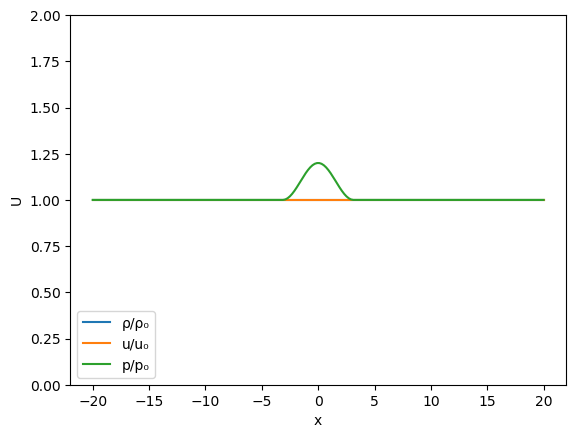

In [14]:
# Hodnoty velicin v nerozrusenem proudu
rho0   = 1.2
a0     = 340.0
u0     = 100.0
gamma0 = 1.4
p0  = rho0 * a0^2 / gamma0

function U0(x)
    U = [rho0; u0; p0]
    if abs(x) < PI
        U[3] += (cos(x)+1) * 0.1*p0
    end
    return U
end

x=range(-20, stop=20, length=200)

plot(x, [U0(xi)[1]/rho0  for xi in x], label="ρ/ρ₀")
plot(x, [U0(xi)[2]/u0 for xi in x], label="$u/u₀")
plot(x, [U0(xi)[3]/p0 for xi in x], label="p/p₀")
ylim(0,2); xlabel("x");
ylabel("U")
legend(loc="lower left");

In [15]:
R0 = [subs(subs(R[i,j], rhoBar, rho0), aBar, a0) for i=1:3,j=1:3]

3×3 Array{Sym,2}:
 1   4.32525951557093e-6  4.32525951557093e-6
 0  -0.00122549019607843  0.00122549019607843
 0                   1/2                  1/2

In [16]:
R01 = [subs(subs(R1[i,j], rhoBar, rho0), aBar, a0) for i=1:3,j=1:3]

3×3 Array{Sym,2}:
 1                  0  -8.65051903114187e-6
 0  -408.000000000000                     1
 0   408.000000000000                     1

In [17]:
R0*R01

3×3 Array{Sym,2}:
 1                 0  0
 0  1.00000000000000  0
 0                 0  1

In [18]:
lambda0 = [subs(subs(l, uBar, u0), aBar, a0) for l in lambda]

3-element Array{Sym,1}:
  100.000000000000
 -240.000000000000
  440.000000000000

In [19]:
V0(x) = R01*U0(x);

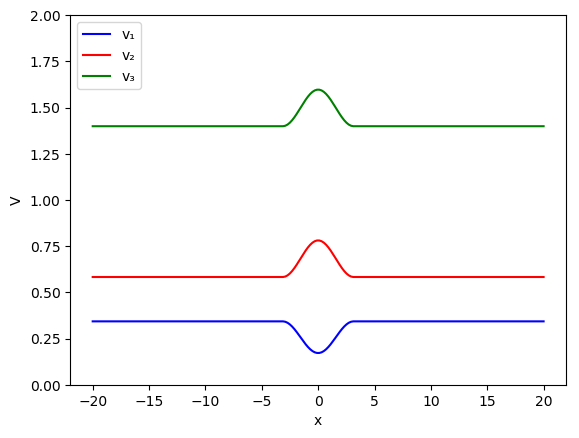

In [20]:
plot(x, [V0(xi)[1]  for xi in x], "-b", label="v₁")
plot(x, [V0(xi)[2]/1e5  for xi in x], "-r", label="v₂")
plot(x, [V0(xi)[3]/1e5  for xi in x], "-g", label="v₃")
ylim(0,2)
xlabel("x"); ylabel("V");
legend(loc="upper left");

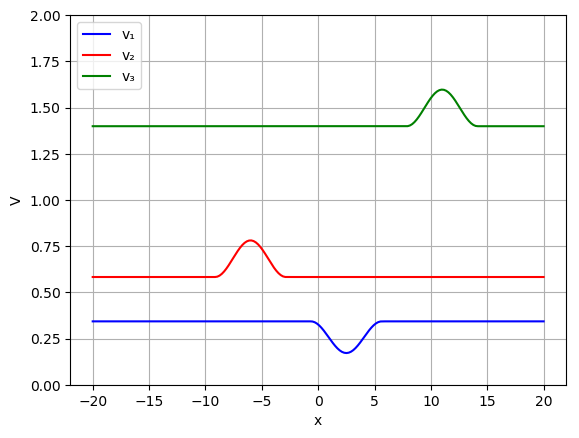

In [21]:
Vt(x,t) = [V0(x-lambda0[1]*t)[1]; V0(x-lambda0[2]*t)[2]; V0(x-lambda0[3]*t)[3]]

t=0.025

plot(x, [Vt(xi,t)[1]  for xi in x], "-b", label="v₁")
plot(x, [Vt(xi,t)[2]/1e5  for xi in x], "-r", label="v₂")
plot(x, [Vt(xi,t)[3]/1e5  for xi in x], "-g", label="v₃")
ylim(0,2); grid(true)
xlabel("x"); ylabel("V");
legend(loc="upper left");

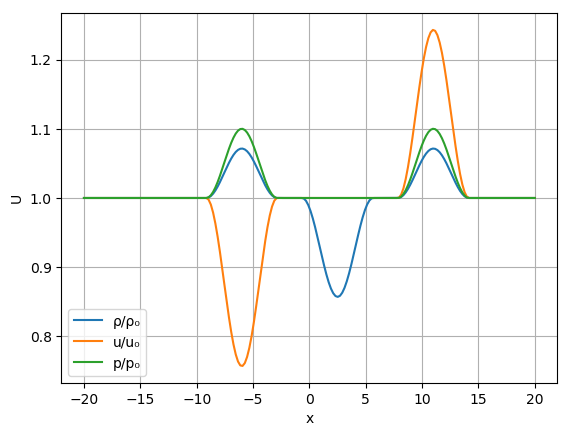

In [22]:
Ut(x,t) = R0*Vt(x,t)

plot(x, [Ut(xi,t)[1]/rho0  for xi in x], label="ρ/ρ₀")
plot(x, [Ut(xi,t)[2]/u0  for xi in x], label="u/u₀")
plot(x, [Ut(xi,t)[3]/p0  for xi in x], label="p/p₀")
xlabel("x");
ylabel("U");
grid(true)
legend(loc="lower left");